In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Binary Classification Model

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:,3:] # petal widthfeature
y = (iris['target'] == 2).astype(np.int) #2 is for Iris Virginica

#### Training

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Visualising

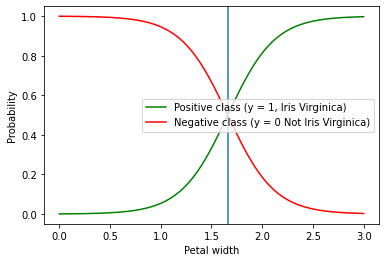

In [ ]:
# since the decison boundary depends only on the value of theta we can use our choice of X values with
# the above calculated theta values to get the decison boundary

X_from_0_to_3 = np.linspace(0, 3, 1000).reshape(1000,1)
y_probs = log_regression.predict_proba(X_from_0_to_3)#This is a mX2 dimensional vector with first column for prob=0 and second for prob=1
plt.plot(X_new, y_probs[:,1], 'g-', label='Positive class (y = 1, Iris Virginica)')
plt.plot(X_new, y_probs[:,0], 'r-', label='Negative class (y = 0 Not Iris Virginica)')
plt.axvline(x=1.6625)
plt.xlabel('Petal width')
plt.ylabel('Probability')
plt.legend()

#decision boundary at intersection of two curves and petal width at intersection = 1.6625

#### Performance

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(log_regression, X, y, cv=3, scoring="accuracy")# The cv parameter is basically diving the test set into that many parts and training on one while testing on other
print(cv_score)

[0.98 0.96 0.88]


In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(log_regression, X, y, cv=3)
# We dont want to use the test for now so we make predictions in train set
# cross_val_predict will perform K-fold cross-validation to predict from train set such that prediction made on an eg. is not used in training the model

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(conf_matrix)
print(precision)
print(recall)
print(f1)

[[96  4]
 [ 5 45]]
0.9183673469387755
0.9
0.9090909090909091


### Multi-class classification(Softmax)
For mathematics see page 149 of book

In [ ]:
X_multi = iris["data"][:, (2, 3)] # petal length, petal width 
y_multi = iris["target"]

#### Training

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)# C is for regularization
softmax_reg.fit(X_multi, y_multi)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


#### Performance

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(softmax_reg, X_multi, y_multi, cv=3, scoring="accuracy")# The cv parameter is basically diving the test set into that many parts and training on one while testing on other
print(cv_score)

[0.98 0.94 0.96]


In [ ]:
from sklearn.model_selection import cross_val_predict
y_multi_pred = cross_val_predict(softmax_reg, X_multi, y_multi, cv=3)
# We dont want to use the test for now so we make predictions in train set
# cross_val_predict will perform K-fold cross-validation to predict from train set such that prediction made on an eg. is not used in training the model

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_multi, y_multi_pred)
print(conf_matrix)

#Have to change setting for precison_score in softmax

#precision = precision_score(y_multi, y_multi_pred)
#recall = recall_score(y_multi, y_multi_pred)
#f1 = f1_score(y_multi, y_multi_pred)

#print(precision)
#print(recall)
#print(f1)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
